# Import required libraries

In [22]:
import pandas as pd              # for working with dataframes (tables of data)
import numpy as np               # for numerical operations (e.g., arrays, math functions)
import matplotlib.pyplot as plt  # for creating plots and charts
import seaborn as sns            # for advanced and prettier data visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Optional: Set a default style for plots (makes charts look cleaner)
sns.set(style="whitegrid")


# Load the Titanic dataset from Seaborn

In [3]:
df = sns.load_dataset('titanic')

# Show the number of rows and columns
print("Dataset shape:", df.shape)

# Show the first 5 rows
df.head()


Dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA – Understanding the Titanic Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Visualize Overall Survival Count

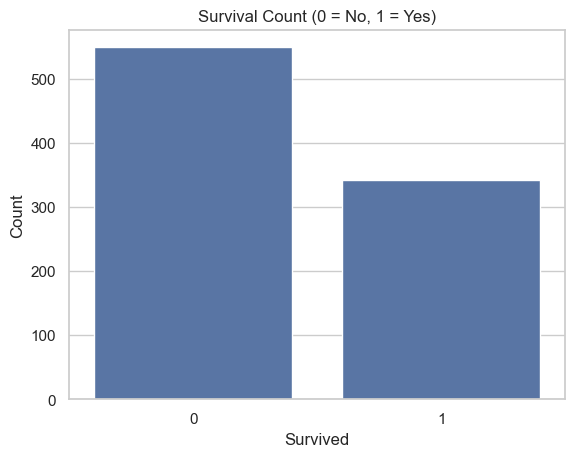

In [6]:
# Visualize how many people survived (1) vs did not survive (0)
sns.countplot(x='survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


# Survival by Gender

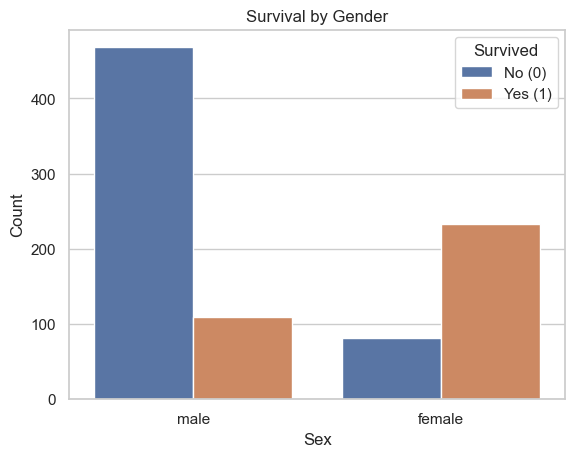

In [7]:
# Compare survival between males and females
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.show()



# Survival by Passenger Class

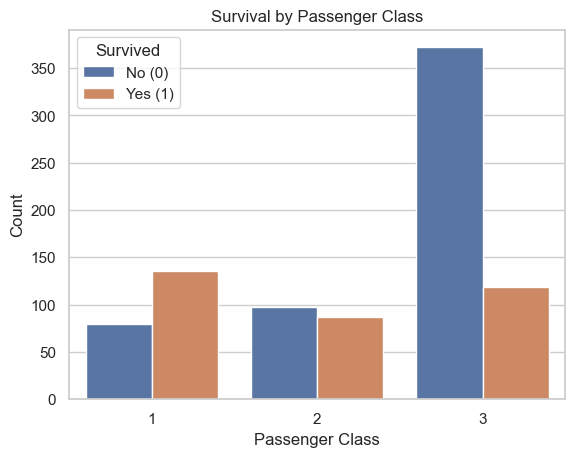

In [8]:
# Compare survival based on passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.show()


# Handle Missing Values & Clean the Data

In [9]:
# Check missing values in each column
df.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Drop Useless or Highly Missing Columns

In [11]:
# Drop columns with too many missing values or irrelevant info
df.drop(['deck', 'embark_town', 'alive', 'class', 'who'], axis=1, inplace=True)

# Show remaining columns
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'alone'],
      dtype='object')

# Filling Missing Values

In [12]:
# Fill missing 'age' with median value (safer than mean when outliers exist)
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with the most common port
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Confirm no missing values remain
df.isnull().sum()


C:\Users\RUKUM\AppData\Local\Temp\ipykernel_10360\2487521141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\RUKUM\AppData\Local\Temp\ipykernel_10360\2487521141.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

# Prepare Data for Logistic Regression

In [17]:
df.dtypes

survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
adult_male       bool
alone            bool
dtype: object

In [18]:
# Convert 'sex' and 'embarked' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Show first few rows
df_encoded.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True


In [20]:
# Separate features (X) and target (y)
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shape of splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (712, 10)
Test shape: (179, 10)


# Train the model

In [23]:
# Create the model
model = LogisticRegression(max_iter=1000)

# Train it on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Make Predictions



In [26]:
y_pred = model.predict(X_test)

# Evaluate the Accuracy Score

In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 81.56 %


# Confusion Matrix (Visual)

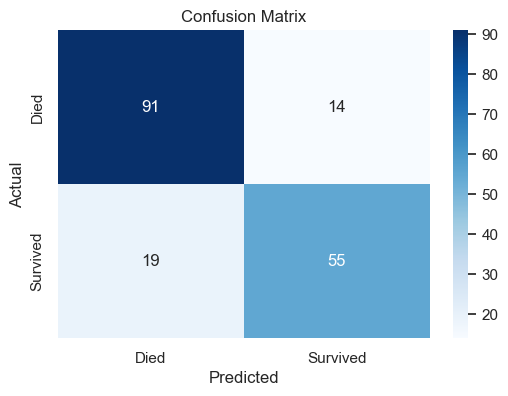

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
